In [1]:
%matplotlib notebook
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

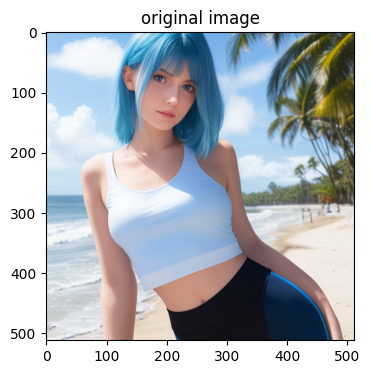

(512, 512, 3)
(512, 512, 3)
3


In [3]:
im = plt.imread('images/Meki.png')
plt.figure(1,figsize = (6, 4))
plt.imshow(im)
plt.title("original image")
plt.show()
print(im.shape)

print(im.shape)
print(len(im.shape))

In [4]:
def extract_colors(im, foreground_slices_list, background_slices_list):
    # Extract the RGB channels from the image
    R = im[:,:,0].flatten()
    G = im[:,:,1].flatten()
    B = im[:,:,2].flatten()
    
    # Initialize empty lists for foreground and background colors
    R_foreground = []
    G_foreground = []
    B_foreground = []
    R_background = []
    G_background = []
    B_background = []
    
    # Extract the foreground colors using the given slices
    for foreground_slices in foreground_slices_list:
        R_foreground.extend(im[foreground_slices[0]:foreground_slices[1], foreground_slices[2]:foreground_slices[3], 0].flatten())
        G_foreground.extend(im[foreground_slices[0]:foreground_slices[1], foreground_slices[2]:foreground_slices[3], 1].flatten())
        B_foreground.extend(im[foreground_slices[0]:foreground_slices[1], foreground_slices[2]:foreground_slices[3], 2].flatten())
    
    # Extract the background colors using the given slices
    for background_slices in background_slices_list:
        R_background.extend(im[background_slices[0]:background_slices[1], background_slices[2]:background_slices[3], 0].flatten())
        G_background.extend(im[background_slices[0]:background_slices[1], background_slices[2]:background_slices[3], 1].flatten())
        B_background.extend(im[background_slices[0]:background_slices[1], background_slices[2]:background_slices[3], 2].flatten())
    
    # Return the extracted colors
    return (R_foreground, G_foreground, B_foreground), (R_background, G_background, B_background)

foreground_slices_list = [(150, 250, 250, 300), (300, 500, 200, 300),(0, 200, 100, 300)]
background_slices_list = [(50, 350, 20, 50), (0, 300, 400, 500), (300, 500, 0, 80)]

foreground_colors, background_colors = extract_colors(im, foreground_slices_list, background_slices_list)

R1, G1, B1 = foreground_colors
R0, G0, B0 = background_colors
# set of colors for all image pixels
R = im[:,:,0].flatten()
G = im[:,:,1].flatten()
B = im[:,:,2].flatten()
data1 = np.vstack([R1,G1,B1])
data0 = np.vstack([R0,G0,B0])
data  = np.vstack([R,G,B])

## Visualize the Cuts

THe first box would print all the forground sample slices and the next would print the background slices. 

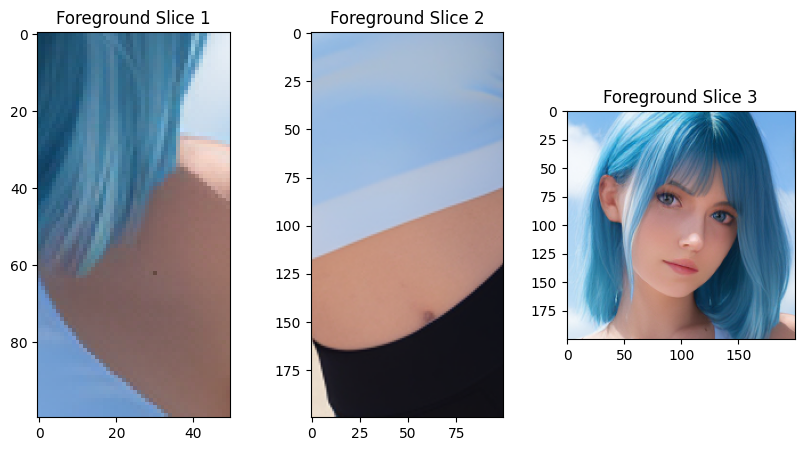

In [5]:
# Visualize the foreground slices
plt.figure(figsize=(10, 5))
for i, foreground_slices in enumerate(foreground_slices_list):
    plt.subplot(1, len(foreground_slices_list), i+1)
    plt.imshow(im[foreground_slices[0]:foreground_slices[1], foreground_slices[2]:foreground_slices[3]])
    plt.title(f"Foreground Slice {i+1}")
plt.show()



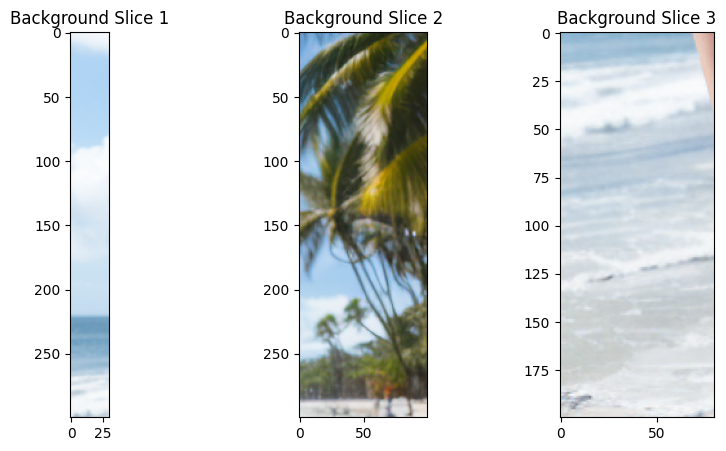

In [6]:
# Visualize the background slices
plt.figure(figsize=(10, 5))
for i, background_slices in enumerate(background_slices_list):
    plt.subplot(1, len(background_slices_list), i+1)
    plt.imshow(im[background_slices[0]:background_slices[1], background_slices[2]:background_slices[3]])
    plt.title(f"Background Slice {i+1}")
plt.show()

In [7]:
data1.shape

(3, 65000)

In [8]:
%%time

# estimate color distributions using GMM - should be fast (1-2 seconds for both models)
from sklearn import mixture

gmm1 = mixture.GaussianMixture(n_components=7, covariance_type='full')
gmm1.fit(data1.T)
gmm0 = mixture.GaussianMixture(n_components=7, covariance_type='full')
gmm0.fit(data0.T)
like1 = -gmm1.score_samples(data.T)
like0 = -gmm0.score_samples(data.T)

CPU times: user 51.9 s, sys: 1.56 s, total: 53.4 s
Wall time: 11.6 s


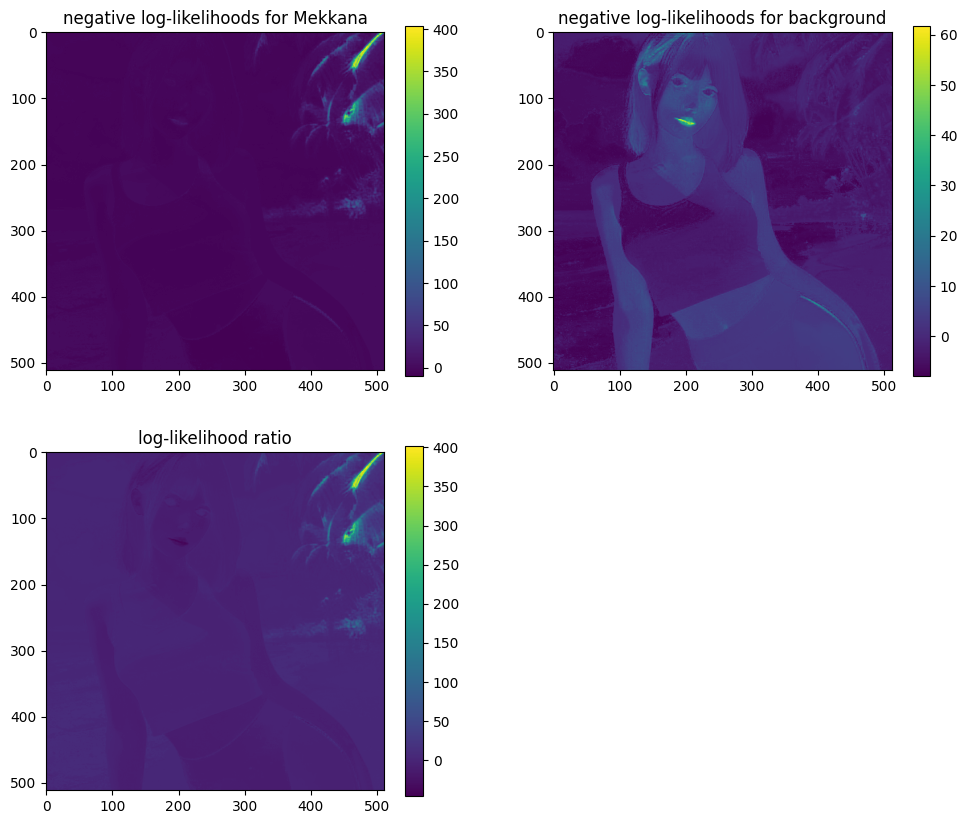

In [9]:
like1_im = like1.reshape((im.shape[0],im.shape[1]))
like0_im = like0.reshape((im.shape[0],im.shape[1]))
                   

fig = plt.figure(figsize = (12, 10))
plt.subplot(221)
plt.title("negative log-likelihoods for Mekkana")
plt.imshow(like1_im)
plt.colorbar()
plt.subplot(222) 
plt.title("negative log-likelihoods for background")
plt.imshow(like0_im)
plt.colorbar()
plt.subplot(223) 
plt.title("log-likelihood ratio")
plt.imshow(like1_im - like0_im)
plt.colorbar()


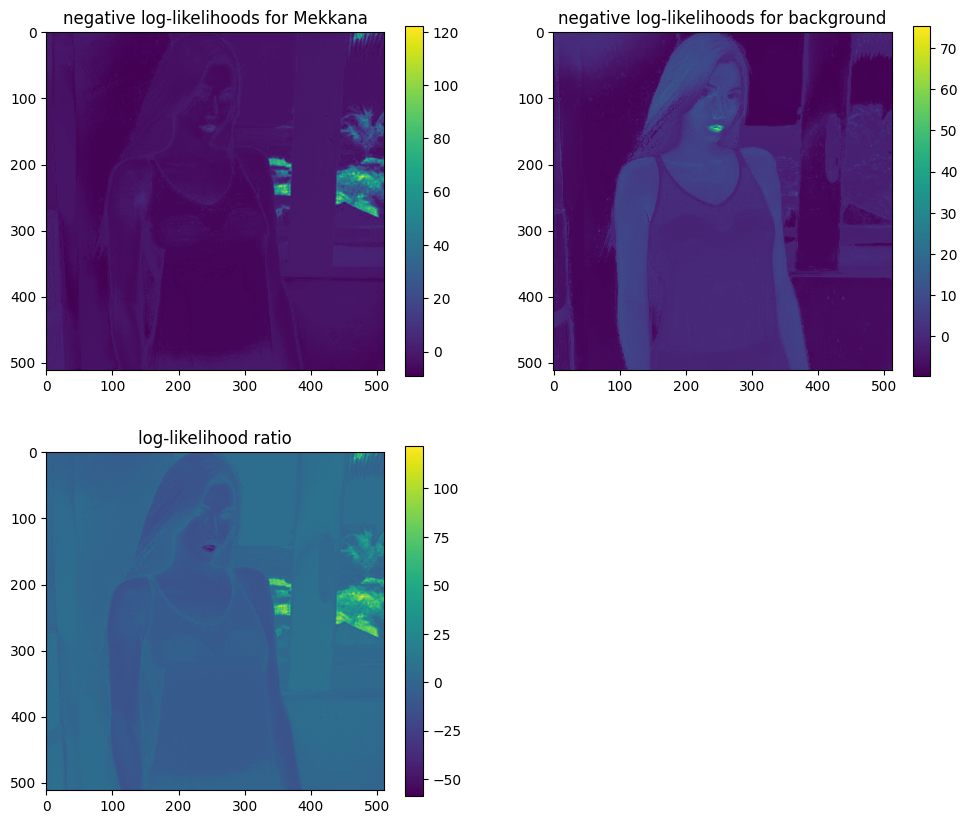

In [7]:
im = plt.imread('images/Meki2.png')
from calculate_GMM import GMM
foreground_slices_list = [(150, 250, 250, 300), (300, 500, 200, 300),(0, 200, 100, 300)]
background_slices_list = [(50, 350, 20, 50), (0, 300, 400, 500), (300, 500, 0, 80)]
like1_im, like0_im = GMM(im, foreground_slices_list, background_slices_list)
                   

fig = plt.figure(figsize = (12, 10))
plt.subplot(221)
plt.title("negative log-likelihoods for Mekkana")
plt.imshow(like1_im)
plt.colorbar()
plt.subplot(222) 
plt.title("negative log-likelihoods for background")
plt.imshow(like0_im)
plt.colorbar()
plt.subplot(223) 
plt.title("log-likelihood ratio")
plt.imshow(like1_im - like0_im)
plt.colorbar()
